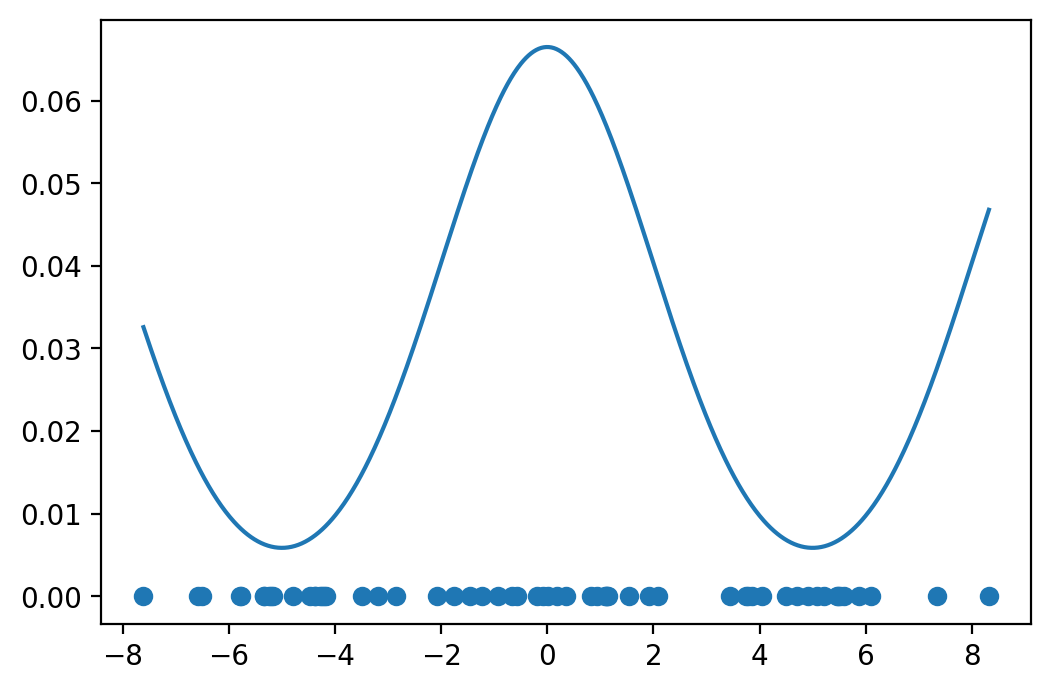

In [226]:
import numpy as np
from numpy.random import multivariate_normal as normal
from numpy.random import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm

##first create three clusters
X = np.linspace(-5,5,num=20)
cluster1 = X*rand(len(X))
cluster2 = X*rand(len(X)) + 5
cluster3 = X*rand(len(X)) -5

data = np.vstack((cluster1,cluster2,cluster3)).flatten()

##now we dont know where the data came from

##define mixture model
def mixture(x,pi,mu,cov):
    res = 0
    for i in range(len(pi)):
        res += pi[i]*norm.pdf(x,mu[i],cov[i])
    return res


##initialize parameters
pis = np.array([1/3,1/3,1/3])
mus = np.array([-10,0,10])
covs = np.ones(3)*2


##Plot
xvals = np.linspace(np.min(data),np.max(data),1000)
plt.figure(dpi=200)
plt.scatter(data,np.zeros(len(data)))
plt.plot(xvals,mixture(xvals,pis,mus,covs))


estimated parameters:
means: [0 0 0]
covariances: [17.81572213 17.8157222  17.81572219]
mixing coefficients: [0.49241182 0.20507229 0.30251589]


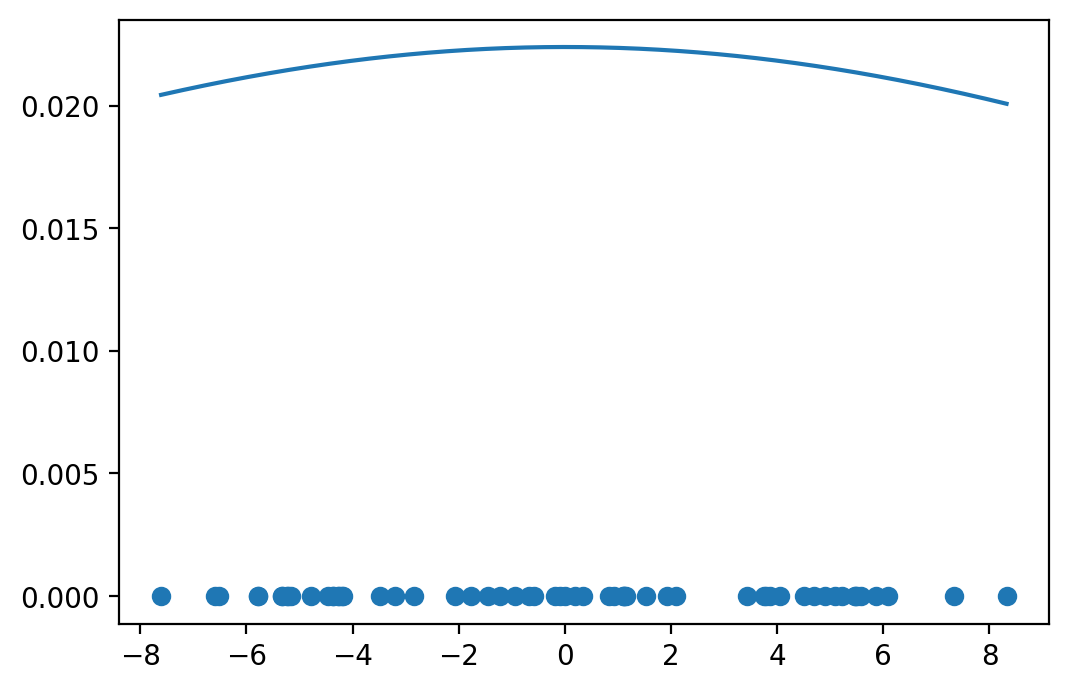

In [227]:
##define responsibilities

def gamma(x,pi,mu,cov,k):
    return pi[k]*norm.pdf(x,mu[k],cov[k]) / mixture(x,pi,mu,cov)
    

r = np.zeros((len(data),3))
    
for i in range(10):
    ##first compute responsibility matrix gamma(z_nk) (E-step)
    for n in range(len(data)):
        for k in range(3):
            r[n,k] = gamma(data[n],pis,mus,covs,k)
            
   
    ##compute N_k's needed for mean and covariance
    Nk = np.zeros(3)
    for k in range(3):
        Nk[k] = sum(r[:,k])
            
 
    ##next update means and pi's (M - step)
    for k in range(3):
        mean = 0
        for n in range(len(data)):
            mean += r[n,k]*data[n]
        mean /= Nk[k] 
        mus[k] = mean
   
        
        
    ##now covariances
    for k in range(3):
        temp = 0
        for n in range(len(data)):
            temp += r[n,k]*(data[n]-mus[k])**2
        temp /= Nk[k]
        covs[k] = temp
        
    ##and finally pi's
    for k in range(3):
        pis[k] = Nk[k]/len(data)
        
        
print("estimated parameters:")
print("means: {}".format(mus))
print("covariances: {}".format(covs))
print("mixing coefficients: {}".format(pis))


##Plot
plt.figure(dpi=200)
plt.scatter(data,np.zeros(len(data)))
plt.plot(xvals,mixture(xvals,pis,mus,covs))
